## Airline Review Analysis Part 1 EDA

**Unveiling Insights from a Dataset of 128k Airline Reviews!**

In this project, I will explore a publicly available dataset consisting of ["128k Airline Reviews"](https://www.kaggle.com/datasets/joelljungstrom/128k-airline-reviews). Despite not possessing extensive domain knowledge in the airline industry, I am eager to emabark on this exciting data analysis journey. 

By following established data analysis steps and leveraging machine learning techniques, I aim to uncover hidden patterns and derive valuable insights from the data.

The initial phase of this project involves comprehensively understanding the dataset, exploring its unique characteristics, and gaining familiarity with its underlying structure. Subsequently, meticulous data cleaning will be conducted to enhance overall data quality.

Let's get started!

## Table of Contents
* <a href="#int">1. Introduction</a>
* <a href="#prel">2. Preliminary Data Exploration</a>
* <a href="#clean">3. Data Cleaning</a>
  * <a href="#sec3.1"> 3.1. `DatePub` </a>
  * <a href="#sec3.2"> 3.2. `AirlineName`/ `Slug`/ `Aircarft`</a>
  * <a href="#sec3.3"> 3.3. `OriginCountry`/ `Route`/ `Title`/ `unique_id`</a>
  * <a href="#sec3.4"> 3.4. `DateFlown`/ `MonthYearPublished`</a>
  * <a href="#sec3.5"> 3.5 `TravelType`</a>
  * <a href="#sec3.6"> 3.6 `CabinType`</a>  
  * <a href="#sec3.7"> 3.7 `TripVerified`</a>
  * <a href="#sec3.8"> 3.8 `OverallScore` and `-Rating` columns</a>
  * <a href="#sec3.9"> 3.9 `Recommended`</a>
  * <a href="#sec3.10"> 3.10.`Review`</a>    
* <a href="#eda">4. Exploratory Data Analysis (EDA)</a>
  * <a href="#sec4.1"> 4.1. Analysis of Airline Names: Frequency and Distribution</a>
  * <a href="#sec4.2"> 4.2. Understanding Patterns: Correlation Heatmap</a>
  * <a href="#sec4.3"> 4.3. Visualizing Proportions of Recommendations by Airline</a>
  * <a href="#sec4.4"> 4.4. Text Vectorization</a>
* <a href="#sum">5. Finding Summary</a>
* <a href="#sum">6. Next Steps</a>

<a id='intro'></a>
## 1. Introduction

Analyzing airline reviews is a crucial business task that can uncover patterns and trends related to service quality, customer satisfaction, and operational efficiency. By examining customer ratings and sentiments expressed in the reviews, we can gain a deep understanding of customer experiences, identify areas for improvement, and make informed business decisions. 

By leveraging the power of data analysis and machine learning, we can address business problems such as improving customer satisfaction, enhancing brand reputation, optimizing operations, and ultimately driving sustainable growth in the highly competitive airline industry.

<a id='prel'></a>
## 2. Preliminary Data Exploration

In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Random seed for reproducibility

np.random.seed(123)

In [2]:
# Import airline review data 

reviews_df = pd.read_csv('AirlineReviews.csv')
reviews_df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633


In [3]:
# Learn about the DataFrame
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Aircraft             36424 non-null   object 
 1   AirlineName          129455 non-null  object 
 2   CabinType            126437 non-null  object 
 3   DateFlown            90993 non-null   object 
 4   DatePub              129455 non-null  object 
 5   EntertainmentRating  129455 non-null  int64  
 6   FoodRating           129455 non-null  int64  
 7   GroundServiceRating  129455 non-null  int64  
 8   OriginCountry        127777 non-null  object 
 9   OverallScore         125124 non-null  float64
 10  Recommended          129455 non-null  object 
 11  Review               128631 non-null  object 
 12  Route                90825 non-null   object 
 13  SeatComfortRating    129455 non-null  int64  
 14  ServiceRating        129455 non-null  int64  
 15  Slug             

In [77]:
reviews_df['Review'][0]

"Moroni to Moheli. Turned out to be a pretty decent airline. Online booking worked well, checkin and boarding was fine and the plane looked well maintained. Its a very short flight - just 20 minutes or so so i didn't expect much but they still managed to hand our a bottle of water and some biscuits which i though was very nice. Both flights on time."

In [4]:
# Current shape of dataset
print(f"Currently, the dataset has {reviews_df.shape[0]} rows and {reviews_df.shape[1]} columns.")

Currently, the dataset has 129455 rows and 22 columns.


In [5]:
# Check missing values and duplicates

print(f"There are {reviews_df.isna().sum().sum()} missing values.")
print(f"There are {reviews_df.duplicated().sum()} duplicate rows.")

There are 288234 missing values.
There are 0 duplicate rows.


Missing values are from non-numeric colulmns.

In [6]:
# Select object columns
object_columns = reviews_df.select_dtypes(include='object')

# Display the first 5 rows of object columns
object_columns.head(5)

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,OriginCountry,Recommended,Review,Route,Slug,Title,TravelType,TripVerified,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,Netherlands,yes,Moroni to Moheli. Turned out to be a pretty de...,Moroni to Moheli,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,UnitedKingdom,no,Moroni to Anjouan. It is a very small airline....,Moroni to Anjouan,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,UnitedKingdom,no,Anjouan to Dzaoudzi. A very small airline and ...,Anjouan to Dzaoudzi,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,Denmark,yes,Havana - Cayo Coco return. A one hour flight w...,NaN,aerocaribbean,Aerocaribbean customer review,NaN,NaN,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,UnitedKingdom,no,Holguin to Havana last week. Okay apart from i...,NaN,aerocaribbean,Aerocaribbean customer review,NaN,NaN,d7bea425-c58a-4a7e-8269-02e0e6516633


Some columns in the dataset appear to have a limited number of response options. For instance, the `TripVerified` column seems to contains two distinct values: 'verified' (Trip Verified) or 'not verified'. Missing values in this column might be represented as NaNs. 

Let's examine other columns that exhibit a similar pattern of having a small set of possible values to choose from.

In [7]:
# Find unique values in the 'TripVerified' column
verified_trips = reviews_df['TripVerified'].unique()

# Print the unique values
print(verified_trips)

['Trip Verified' nan 'Not Verified' 'Trip Verified,Trip Verified'
 'NotVerified' 'Not Verified,Not Verified'
 'Chicago to Colorado Springs. Not Verified']


It seems there is some inconsistency in the representation of verified and not verified trips.<Br>It signlas that we need thorough data cleaning to ensure data quality and consistency.<br>We also need to think about how to handle missing values (NaN) in the `TripVerified` column.<br>It might involve strategies such as imputation or exclusion.

In [8]:
# Find unique values in the 'TravelType' column
unique_travel_types = reviews_df['TravelType'].unique()

# Print the unique values
print(unique_travel_types)

['Solo Leisure' nan 'Business' 'Couple Leisure' 'Family Leisure']


In [9]:
# Find unique values in the 'CabinType' column
cabin_types = reviews_df['CabinType'].unique()

# Print the unique values
print(cabin_types)

['Economy Class' nan 'Business Class' 'First Class' 'Premium Economy']


In [10]:
# Check how many values included in the 'AirlineName' column
reviews_df['AirlineName'].nunique()

547

In [11]:
# Check how many values included in the 'OriginCountry' column
reviews_df['OriginCountry'].nunique()

202

In [12]:
# Check how many values included in the 'Recommended' column
reviews_df['Recommended'].nunique()

2

Now that we have taken a preliminary look at the dataset, it is time to proceed with data cleaning.

<a id='clean'></a>
## 3. Data Cleaning

<a id='sec3.1'></a>
### 3.1. `DatePub` 

In [13]:
# Extract month and year from 'DatePub' column
reviews_df['MonthYearPublished'] = pd.to_datetime(reviews_df['DatePub']).dt.to_period('M')

# Convert 'MonthYearPublished' to numeric representation
reviews_df['MonthYearPublished'] = reviews_df['MonthYearPublished'].dt.year.astype(str) + reviews_df['MonthYearPublished'].dt.month.astype(str).str.zfill(2)

# Convert 'MonthYearPublished' column to numeric type
reviews_df['MonthYearPublished'] = pd.to_numeric(reviews_df['MonthYearPublished'], errors='coerce')

# Print the updated column
print(reviews_df['MonthYearPublished'])

0         201911
1         201906
2         201906
3         201012
4         201011
           ...  
129450    201007
129451    201006
129452    201006
129453    201006
129454    201006
Name: MonthYearPublished, Length: 129455, dtype: int64


In [14]:
# Find the minimum and maximum dates
earliest_date = reviews_df['MonthYearPublished'].min()
latest_date = reviews_df['MonthYearPublished'].max()

# Print the date range
print(f"The reviews span from {earliest_date} to {latest_date}.")

The reviews span from 200201 to 202305.


The information on the review publication date allows us to analyze the distribution of reviews over a span of 20 years and explore the weekly trends in the number of reviews. By examining the weekly patterns, we can gain insights into the temporal dynamics of customer reviews and identify any notable trends or fluctuations in review activity over time.

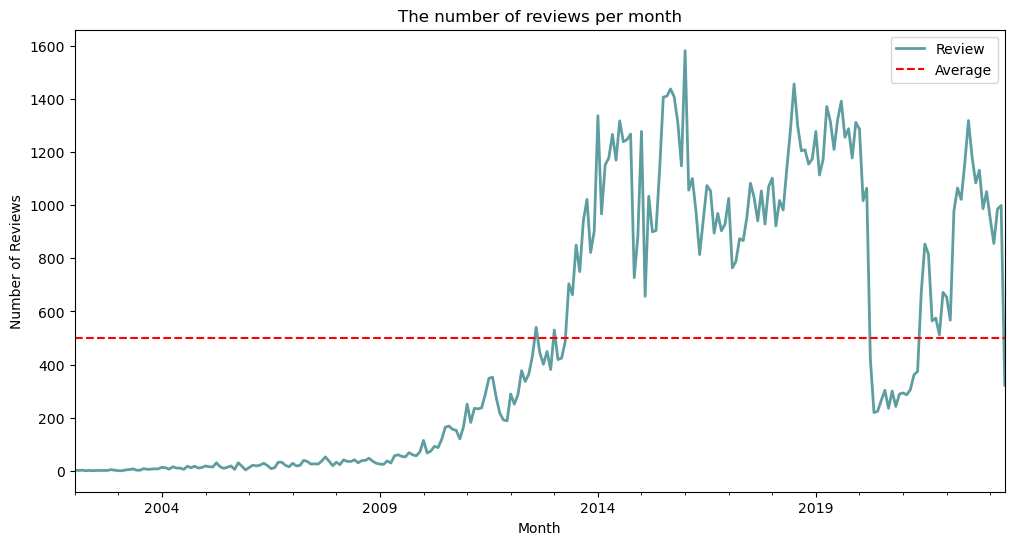

In [15]:
# Convert the 'MonthYearPublished' column to datetime
reviews_df['MonthYearPublished'] = pd.to_datetime(reviews_df['MonthYearPublished'], format='%Y%m')

# Resample the data by month and count the number of reviews per month
monthly_reviews = reviews_df.resample('M', on='MonthYearPublished').count()['Review']

# Calculate the average number of reviews per month
average_reviews = monthly_reviews.mean()

# Plot the monthly review trends
plt.figure(figsize=(12, 6))
monthly_reviews.plot(linewidth=2, color='cadetblue')
plt.axhline(y=average_reviews, color='red', linestyle='--', label='Average')
plt.title('The number of reviews per month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()

In [16]:
# Find the month with the highest number of reviews
highest_reviews_month = monthly_reviews.idxmax()

print(f"The month with the highest number of reviews is: {highest_reviews_month.strftime('%Y-%m')}")

The month with the highest number of reviews is: 2016-01


The number of reviews shows an increasing trend over time, albeit with some variations. There appears to be a potential seasonality, as we observe certain patterns repeating over time. The peak in the number of reviews was reached in January 2016, suggesting a surge in airline usage or perhaps increased engagement with review submissions during this period.

In 2020, the number of reviews experienced a significant drop, most likely due to travel restrictions and decreased airline usage in the wake of the Covid-19 pandemic. This decline brought the review counts below the average line, underscoring the extent of the pandemic's impact on air travel.

The year 2021 saw a dramatic fluctuation in review numbers, possibly reflecting the uneven recovery of global travel as countries grappled with varying stages of the pandemic and implemented different travel policies.

In 2022, the number of reviews nearly returned to the levels seen prior to the pandemic, suggesting a recovery in air travel and passenger engagement in submitting reviews. However, the first half of 2023 witnessed another sharp decrease in reviews. As our dataset ends here, further data and analysis would be required to fully understand the reasons behind this sudden fall.

In [17]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Aircraft             36424 non-null   object        
 1   AirlineName          129455 non-null  object        
 2   CabinType            126437 non-null  object        
 3   DateFlown            90993 non-null   object        
 4   DatePub              129455 non-null  object        
 5   EntertainmentRating  129455 non-null  int64         
 6   FoodRating           129455 non-null  int64         
 7   GroundServiceRating  129455 non-null  int64         
 8   OriginCountry        127777 non-null  object        
 9   OverallScore         125124 non-null  float64       
 10  Recommended          129455 non-null  object        
 11  Review               128631 non-null  object        
 12  Route                90825 non-null   object        
 13  SeatComfortRat

In [18]:
# Drop 'DatePub' column
reviews_df = reviews_df.drop('DatePub', axis=1)

In [19]:
# Sanity check
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Aircraft             36424 non-null   object        
 1   AirlineName          129455 non-null  object        
 2   CabinType            126437 non-null  object        
 3   DateFlown            90993 non-null   object        
 4   EntertainmentRating  129455 non-null  int64         
 5   FoodRating           129455 non-null  int64         
 6   GroundServiceRating  129455 non-null  int64         
 7   OriginCountry        127777 non-null  object        
 8   OverallScore         125124 non-null  float64       
 9   Recommended          129455 non-null  object        
 10  Review               128631 non-null  object        
 11  Route                90825 non-null   object        
 12  SeatComfortRating    129455 non-null  int64         
 13  ServiceRating 

<a id='sec3.2'></a>
### 3.2. `AirlineName`/ `Slug`/ `Aircraft` 

It looks like the `AirlineName` column and the `Slug` column contain the same information. The `AirlineName` column contains the full name of the airlines, while the `Slug` column seems to contain a standardized format of the airline names. Here we can keep the `Slug` column since it has a standardized and consistent format (though the redability is sacrificed).

In [20]:
reviews_df[['AirlineName', 'Slug']].sample(20)

,AirlineName,Slug
84036,Royal Air Maroc,royal-air-maroc
15919,AirAsia,airasia
97825,Southwest Airlines,southwest-airlines
66390,Delta Air Lines,delta-air-lines
88377,Ryanair,ryanair
95819,Sun Country Airlines,sun-country-airlines
79001,Peach Aviation,peach-aviation
39075,China Southern Airlines,china-southern-airlines
119605,Virgin Atlantic,virgin-atlantic-airways
38971,China Southern Airlines,china-southern-airlines


The general conversion rule seems to replace spaces with hyphens and convert the names to lowercase.

In [21]:
# Check how many values included in the 'AirlineName' column
reviews_df['AirlineName'].nunique()

547

In [22]:
# Check how many values included in the 'Slug' column
reviews_df['Slug'].nunique()

548

The unique values for each column reveal a minor discrepancy. However, considering the small difference of only one value, we can choose to select one column over the other to address this inconsistency. Before making a decision, it is advisable to assess whether the general rule we have identified applies consistently and accurately to the majority of the data.

In [23]:
# Create a new column 'Converted' by applying the conversion rules to 'AirlineName'
reviews_df['Converted'] = reviews_df['AirlineName'].str.replace(' ', '-').str.lower()

# Find the differing values between 'Converted' and 'Slug'
differing_values = reviews_df[reviews_df['Converted'] != reviews_df['Slug']]

# Display the differing values
display(differing_values[['AirlineName', 'Converted', 'Slug']])

,AirlineName,Converted,Slug
8510,Air Cote d'Ivoire,air-cote-d'ivoire,air-cote-divoire
9095,Air North Yukon's Airline,air-north-yukon's-airline,air-north-yukons-airline
9096,Air North Yukon's Airline,air-north-yukon's-airline,air-north-yukons-airline
9097,Air North Yukon's Airline,air-north-yukon's-airline,air-north-yukons-airline
9641,Air Vanuatu,air-vanuatu,air-vanuata
...,...,...,...
121992,WestJet Airlines,westjet-airlines,westjet
121993,WestJet Airlines,westjet-airlines,westjet
121994,WestJet Airlines,westjet-airlines,westjet
121995,WestJet Airlines,westjet-airlines,westjet


From the conversion of the "Air Cote d'lvoire", we can identify another rule: remove apostrophes from airline names.<br>We can add this new rule and filter the result accordingly.

The decision of which column to keep depends on several factors, including readability, standardization, consistency, and relevance to the analysis goals.Considering that having a column containing the full names of airlines can be beneficial for reporting, presentation, and communication purposes, it is good to keep the `AirlineName` column. This column provides clear and easily understandable information.

Although the `Slug` column is standardized, we can favor the requirements of readability and communication over standardization. Thus, it is reasonable to drop the 'Slug' column.

Regarding the `Aircraft` column, it contains a significant number of null values and the information about the type of aircraft used for the flight is not highly relevant to the reviews or the analysis goals, it can be dropped as well. This helps simplify the dataset and focus on the more important and informative columns.

In [24]:
# Drop three columns
reviews_df = reviews_df.drop(['Aircraft', 'Slug', 'Converted'], axis=1)

In [25]:
# Sanity check
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   AirlineName          129455 non-null  object        
 1   CabinType            126437 non-null  object        
 2   DateFlown            90993 non-null   object        
 3   EntertainmentRating  129455 non-null  int64         
 4   FoodRating           129455 non-null  int64         
 5   GroundServiceRating  129455 non-null  int64         
 6   OriginCountry        127777 non-null  object        
 7   OverallScore         125124 non-null  float64       
 8   Recommended          129455 non-null  object        
 9   Review               128631 non-null  object        
 10  Route                90825 non-null   object        
 11  SeatComfortRating    129455 non-null  int64         
 12  ServiceRating        129455 non-null  int64         
 13  Title         

The 

In [26]:
reviews_df['unique_id'].nunique()

129455

<a id='sec3.3'></a>
### 3.3. `OriginCountry`/ `Route`/ `Title`/ `unique_id`

We can remove some more columns at this point. However, we should keep in mind that these decisions are based on assumptions that can be challenged from different perspectives.  

- The `OriginCountry` column, representing the reviewers' country of origin, may not provide substantial value for the analysis. While it is possible to hypothesize that customers from different countries have varying rating standards, the lack of domain knowledge and specific insights about this influence makes it difficult to draw meaningful conclusions. Moreover, with a diverse range of countries represented in the dataset, analyzing the impact of individual countries becomes challenging. Therefore, removing the OriginCountry column during data cleaning simplifies the dataset and allows for a focus on more informative features..

- The `Route` column may not provide significant insights for the analysis, as the focus is on customer reviews on services. 

- The `Title` column, containing review titles, may not offer substantial insights beyond what is already captured in the `Review` column.

- The`unique_id` serves as a unique identifier within the dataset but does not directly contribute to the analysis. By removing it, we can simplify the dataset without losing relevant information. 

By dropping these columns, we can streamline the dataset and concentrate on the core aspects of the airline reviews, ensuring a more focused and efficient analysis.

In [27]:
# Drop four columns
reviews_df = reviews_df.drop(['OriginCountry','Route', 'Title', 'unique_id'], axis=1)

In [28]:
# Check the result
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   AirlineName          129455 non-null  object        
 1   CabinType            126437 non-null  object        
 2   DateFlown            90993 non-null   object        
 3   EntertainmentRating  129455 non-null  int64         
 4   FoodRating           129455 non-null  int64         
 5   GroundServiceRating  129455 non-null  int64         
 6   OverallScore         125124 non-null  float64       
 7   Recommended          129455 non-null  object        
 8   Review               128631 non-null  object        
 9   SeatComfortRating    129455 non-null  int64         
 10  ServiceRating        129455 non-null  int64         
 11  TravelType           91146 non-null   object        
 12  TripVerified         59508 non-null   object        
 13  ValueRating   

<a id='sec3.4'></a>
### 3.4. `DateFlown`/ `MonthYearPublished`

Next, let's take a look at the `DateFlown` column. We can examine whether there is a substantial gap between the date when the flight was taken and the date when the review was submitted. If there is no significant time lapse between these two dates, it would be reasonable to retain one of the columns and remove the other.

Assuming that customers typically tend to leave reviews within a few days of their flight, we can expect that the `DateFlown` and review dates would not exhibit a considerable time difference. If this assumption holds true, we can utilize the non-null values from one column to fill in the missing values in the other, effectively ensuring that we have complete and consistent date information across the dataset.

In [29]:
reviews_df[['DateFlown','MonthYearPublished']].sample(20)

,DateFlown,MonthYearPublished
86619,June 2018,2018-07-01
12257,July 2015,2015-07-01
84366,NaN,2012-09-01
19354,NaN,2013-02-01
53287,February 2023,2023-02-01
87766,January 2017,2017-02-01
87383,September 2019,2019-09-01
64221,November 2017,2017-12-01
113278,NaN,2011-07-01
102022,May 2017,2017-05-01


Based on the sample provided, it appears that the assumption tends to hold. The majority of the rows display a pattern, indicating that customers tend to leave reviews within a reasonable timeframe after their flight. Now we can consider retaining one of the columns and utilizing it to fill in missing values in the other. Luckily, the `MonthYearPublished` column has no missin values so we can leave the column and drop the `DateFlown` column.

In [30]:
# Drop 'DateFlown'
reviews_df = reviews_df.drop(['DateFlown'], axis=1)

In [31]:
# Check the DataFrame again
reviews_df.head()

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,TravelType,TripVerified,ValueRating,WifiRating,MonthYearPublished
0,AB Aviation,Economy Class,0,4,4,9.0,yes,Moroni to Moheli. Turned out to be a pretty de...,4,5,Solo Leisure,Trip Verified,3,0,2019-11-01
1,AB Aviation,Economy Class,0,1,1,1.0,no,Moroni to Anjouan. It is a very small airline....,2,2,Solo Leisure,Trip Verified,2,0,2019-06-01
2,AB Aviation,Economy Class,0,1,1,1.0,no,Anjouan to Dzaoudzi. A very small airline and ...,2,1,Solo Leisure,Trip Verified,2,0,2019-06-01
3,Aerocaribbean,Economy Class,0,0,0,8.0,yes,Havana - Cayo Coco return. A one hour flight w...,0,0,NaN,NaN,4,0,2010-12-01
4,Aerocaribbean,NaN,0,0,0,1.0,no,Holguin to Havana last week. Okay apart from i...,0,0,NaN,NaN,0,0,2010-11-01


<a id='sec3.5'></a>
### 3.5. `TravelType`

Let's examine the `TravelType` column.

In [32]:
# Calculate the percentage of unique values, including null values

travel_type_counts = reviews_df['TravelType'].value_counts(dropna=False)
percentage_counts = (travel_type_counts / len(reviews_df['TravelType'].dropna())) * 100
print(percentage_counts)

NaN               42.030369
Solo Leisure      36.475545
Couple Leisure    26.161324
Family Leisure    21.833103
Business          15.530029
Name: TravelType, dtype: float64


I am wondering the trvael type affects the sentiment of reviews and review ratings.

In [33]:
# To display the full text in the column

pd.set_option('display.max_colwidth', None)
reviews_df['Review'].sample(10)

83638                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Based on the samples, it appears that the `TravelType` column may not significantly contribute to predicting customer reviews. The reviews seem to focus more on specific experiences, such as flight delays, poor service, or issues with baggage handling, rather than being heavily influenced by the type of travel (solo, couple, family, business).

While dropping a column results in the loss of information, in this case, the lack of a compelling imputation method for the missing values makes it reasonable to consider removing the `TravelType` column from the dataset.

In [34]:
# Drop 'TravelType'
reviews_df = reviews_df.drop(['TravelType'], axis=1)

<a id='sec3.6'></a>
### 3.6. `CabinType`

Now take a look at the `CabinType` column. From earlier, we know that the `CabinType` column contains 4 categories and some null values. We can create a copy of the `CabinType` to visualize the number of reviews by cabin type including the null values.

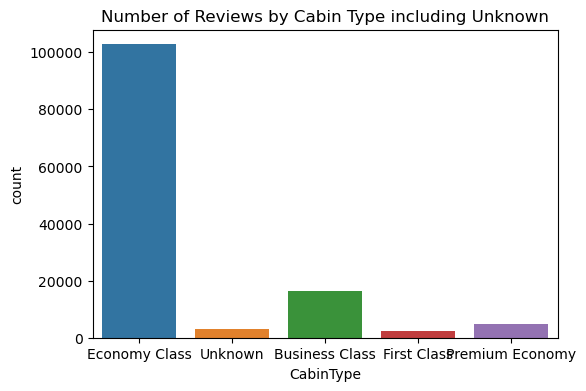

In [35]:
# Copy the 'CabinType' column
cabin_type_copy = reviews_df['CabinType'].copy()

# sns.countplot() function automatically excludes NaN values
# So, we need to replace null values with 'Unknown' in the copy
cabin_type_copy.fillna('Unknown', inplace=True)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(x=cabin_type_copy)
plt.title('Number of Reviews by Cabin Type including Unknown')
plt.show()

In [36]:
# Calculate the percentage of nulls in 'CabinType'
percentage_nulls = reviews_df['CabinType'].isna().mean() * 100

# Print the result
print(f"The percentage of nulls in the 'CabinType' column is {percentage_nulls}%.")

The percentage of nulls in the 'CabinType' column is 2.3313120389324475%.


It would be informative to know the percentage distribution of the `Recommended` column for each cabin type.

In [37]:
# Group by 'CabinType' and calculate the percentage distribution of the 'Recommended' column within each group
recommended_distribution_all = reviews_df.groupby('CabinType')['Recommended'].value_counts(normalize=True) * 100

# Print the percentage distribution
print(recommended_distribution_all)

CabinType        Recommended
Business Class   yes            62.929465
                 no             37.070535
Economy Class    no             63.496374
                 yes            36.503626
First Class      yes            55.306799
                 no             44.693201
Premium Economy  no             56.686047
                 yes            43.313953
Name: Recommended, dtype: float64


The results show that:

- **Business Class**: around 63.8% passengers recommended the airlineund, a higher percentage than any other class. This could be due to higher quality service, more comfortable seating, better food, or other amenities that come with a business class ticket.
- **Economy Class**: the majority (62.3%) did not recommend the airline. 
- **First Class**: passengers had a slightly positive trend with about 56% recommending. 
- **Premium Economy**: This class had more negative reviews than positive, with 56.14% not recommending the airline. Premium economy passengers may have higher expectations due to the higher cost compared to regular economy class, but if the services and amenities do not meet those expectations, they might feel that the value is not worth the extra cost, leading to a lower rate of recommendations.

We should keep in mind that these are just resonable interpretations based on a quick analysis.

In [38]:
# Get the 'Review' column for rows where 'CabinType' is null
null_cabin_reviews = reviews_df[reviews_df['CabinType'].isna()]['Review']

# First 10 rows from the result
sample_reviews = null_cabin_reviews.head(10)

# Print the sample reviews
print(sample_reviews)

4                                                                                                                                                                                                                                                                                                                                                                                             Holguin to Havana last week. Okay apart from issuing duplicate boarding cards to different passengers. Return was in a turbo prop plane which was 1 hour late and was infested by cockroaches running along the floor overhead lockers and electrical ducts. The plane was generally dirty. Obvious lack of maintenance.
5                                                                                                                                                                                                                                                                                                                

In [39]:
# Last 10 rows from the result
sample_reviews = null_cabin_reviews.tail(10)

# Print the sample reviews
print(sample_reviews)

127486                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Jeddah-Sanaa-Paris return. On the way back I had big problem when I arrived to Sanaa my flight from Sanaa to Jeddah was supposed to depart at 1 am - operations cancelled this flight without being advised and postponed it to 1 pm next day. This flight was then delayed on ground as well while all the passengers onboard waiting for a VIP. The whole journey took me more than 40 hours.
127487                                                                                                                                         

From our observations, the missing  `CabinType` values seem to be randomly distributed, without any direct connection to specific airlines or cabin types. We have several strategies to handle these. 
- First, we can discard the rows with missing values, under the assumption that they are missing completely at random. 
- Second, we could replace missing values with the most common category (mode imputation) or use more advanced imputation methods, such as KNN. 
- Lastly, if `CabinType` isn't crucial for our analysis, we could leave these values as they are for now. 

At this point, we're leaning towards the latter option as we haven't decided the exact scope of our analysis. It could range from sentiment analysis to predictive modeling. Once we define our goals, we can decide the best course of action for handling the missing  `CabinType` data.

<a id='sec3.7'></a>
### 3.7. `TripVerified`

Now take a look at the `TripVerified` column.

In [40]:
# Count all unique values in 'TripVerified'
reviews_df['TripVerified'].value_counts(dropna='False')

Trip Verified                                45440
Not Verified                                 14056
NotVerified                                      9
Trip Verified,Trip Verified                      1
Not Verified,Not Verified                        1
Chicago to Colorado Springs. Not Verified        1
Name: TripVerified, dtype: int64

To address the inconsistency in the representation of verified and not verified trips, we can clean the data and standardize the options to two values: `Verified` and `Not Verified`. Additionally, to utilize the data in a numeric format, we can convert the column into a binary format where 1 represents `Verified` and 0 represents `Not Verified`. This transformation will provide a consistent and meaningful representation of the verification status while allowing for further analysis and modeling using the numeric values.

In [41]:
# Step 1: Replace "NotVerified" with "Not Verified"
reviews_df['TripVerified'] = reviews_df['TripVerified'].replace('NotVerified', 'Not Verified')

In [42]:
# Check the result
reviews_df['TripVerified'].value_counts(dropna='False')

Trip Verified                                45440
Not Verified                                 14065
Trip Verified,Trip Verified                      1
Not Verified,Not Verified                        1
Chicago to Colorado Springs. Not Verified        1
Name: TripVerified, dtype: int64

In [43]:
# Step 2: Replace all remaining values other than "Trip Verified" and "Not Verified" with "Not Verified"
reviews_df['TripVerified'] = reviews_df['TripVerified'].apply(lambda x: 'Not Verified' if x not in ['Trip Verified', 'Not Verified'] else x)

In [44]:
# Check the result
reviews_df['TripVerified'].value_counts(dropna='False')

Not Verified     84015
Trip Verified    45440
Name: TripVerified, dtype: int64

In [45]:
# Step 3: Convert "Trip Verified" to 1 and "Not Verified" to 0
reviews_df['TripVerified'] = reviews_df['TripVerified'].map({'Trip Verified': 1, 'Not Verified': 0})

In [46]:
# Check the result
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   AirlineName          129455 non-null  object        
 1   CabinType            126437 non-null  object        
 2   EntertainmentRating  129455 non-null  int64         
 3   FoodRating           129455 non-null  int64         
 4   GroundServiceRating  129455 non-null  int64         
 5   OverallScore         125124 non-null  float64       
 6   Recommended          129455 non-null  object        
 7   Review               128631 non-null  object        
 8   SeatComfortRating    129455 non-null  int64         
 9   ServiceRating        129455 non-null  int64         
 10  TripVerified         129455 non-null  int64         
 11  ValueRating          129455 non-null  int64         
 12  WifiRating           129455 non-null  int64         
 13  MonthYearPubli

<a id='sec3.8'></a>
### 3.8. `OverallScore` and `~Rating` columns

Now, let's explore the `OverallScore` column to understand how it is calculated. This column represents the overall score of the airline, and we are interested in determining whether it is derived from the average of the 7 individual ratings or if there is a different calculation method in place. 

By examining the relationship between the `OverallScore` and the individual ratings such as `EntertainmentRating`, `FoodRating`, `SeatComfortRating`, etc., we can gain insights into how the overall score is derived and assess its validity.

In [47]:
# Group all rating-related columns
ratings_columns = ['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating', 'OverallScore']

# Statistics of rating columns
reviews_df[ratings_columns].describe()

,EntertainmentRating,FoodRating,GroundServiceRating,SeatComfortRating,ServiceRating,ValueRating,WifiRating,OverallScore
count,129455.000000,129455.000000,129455.000000,129455.000000,129455.000000,129455.000000,129455.000000,125124.000000
mean,1.557190,1.989077,1.652010,2.470202,2.689622,2.637527,0.453926,4.556408
std,1.751076,1.774512,1.740252,1.620262,1.774499,1.628808,1.078274,3.498833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,3.000000
75%,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,0.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


Based on these statistics, the `OverallScore` column does not seem to be the simple average of the other ratings columns.

We can create visualization, such as histograms, to understand the relationships between the `OverallScore` and the other ratings columns.

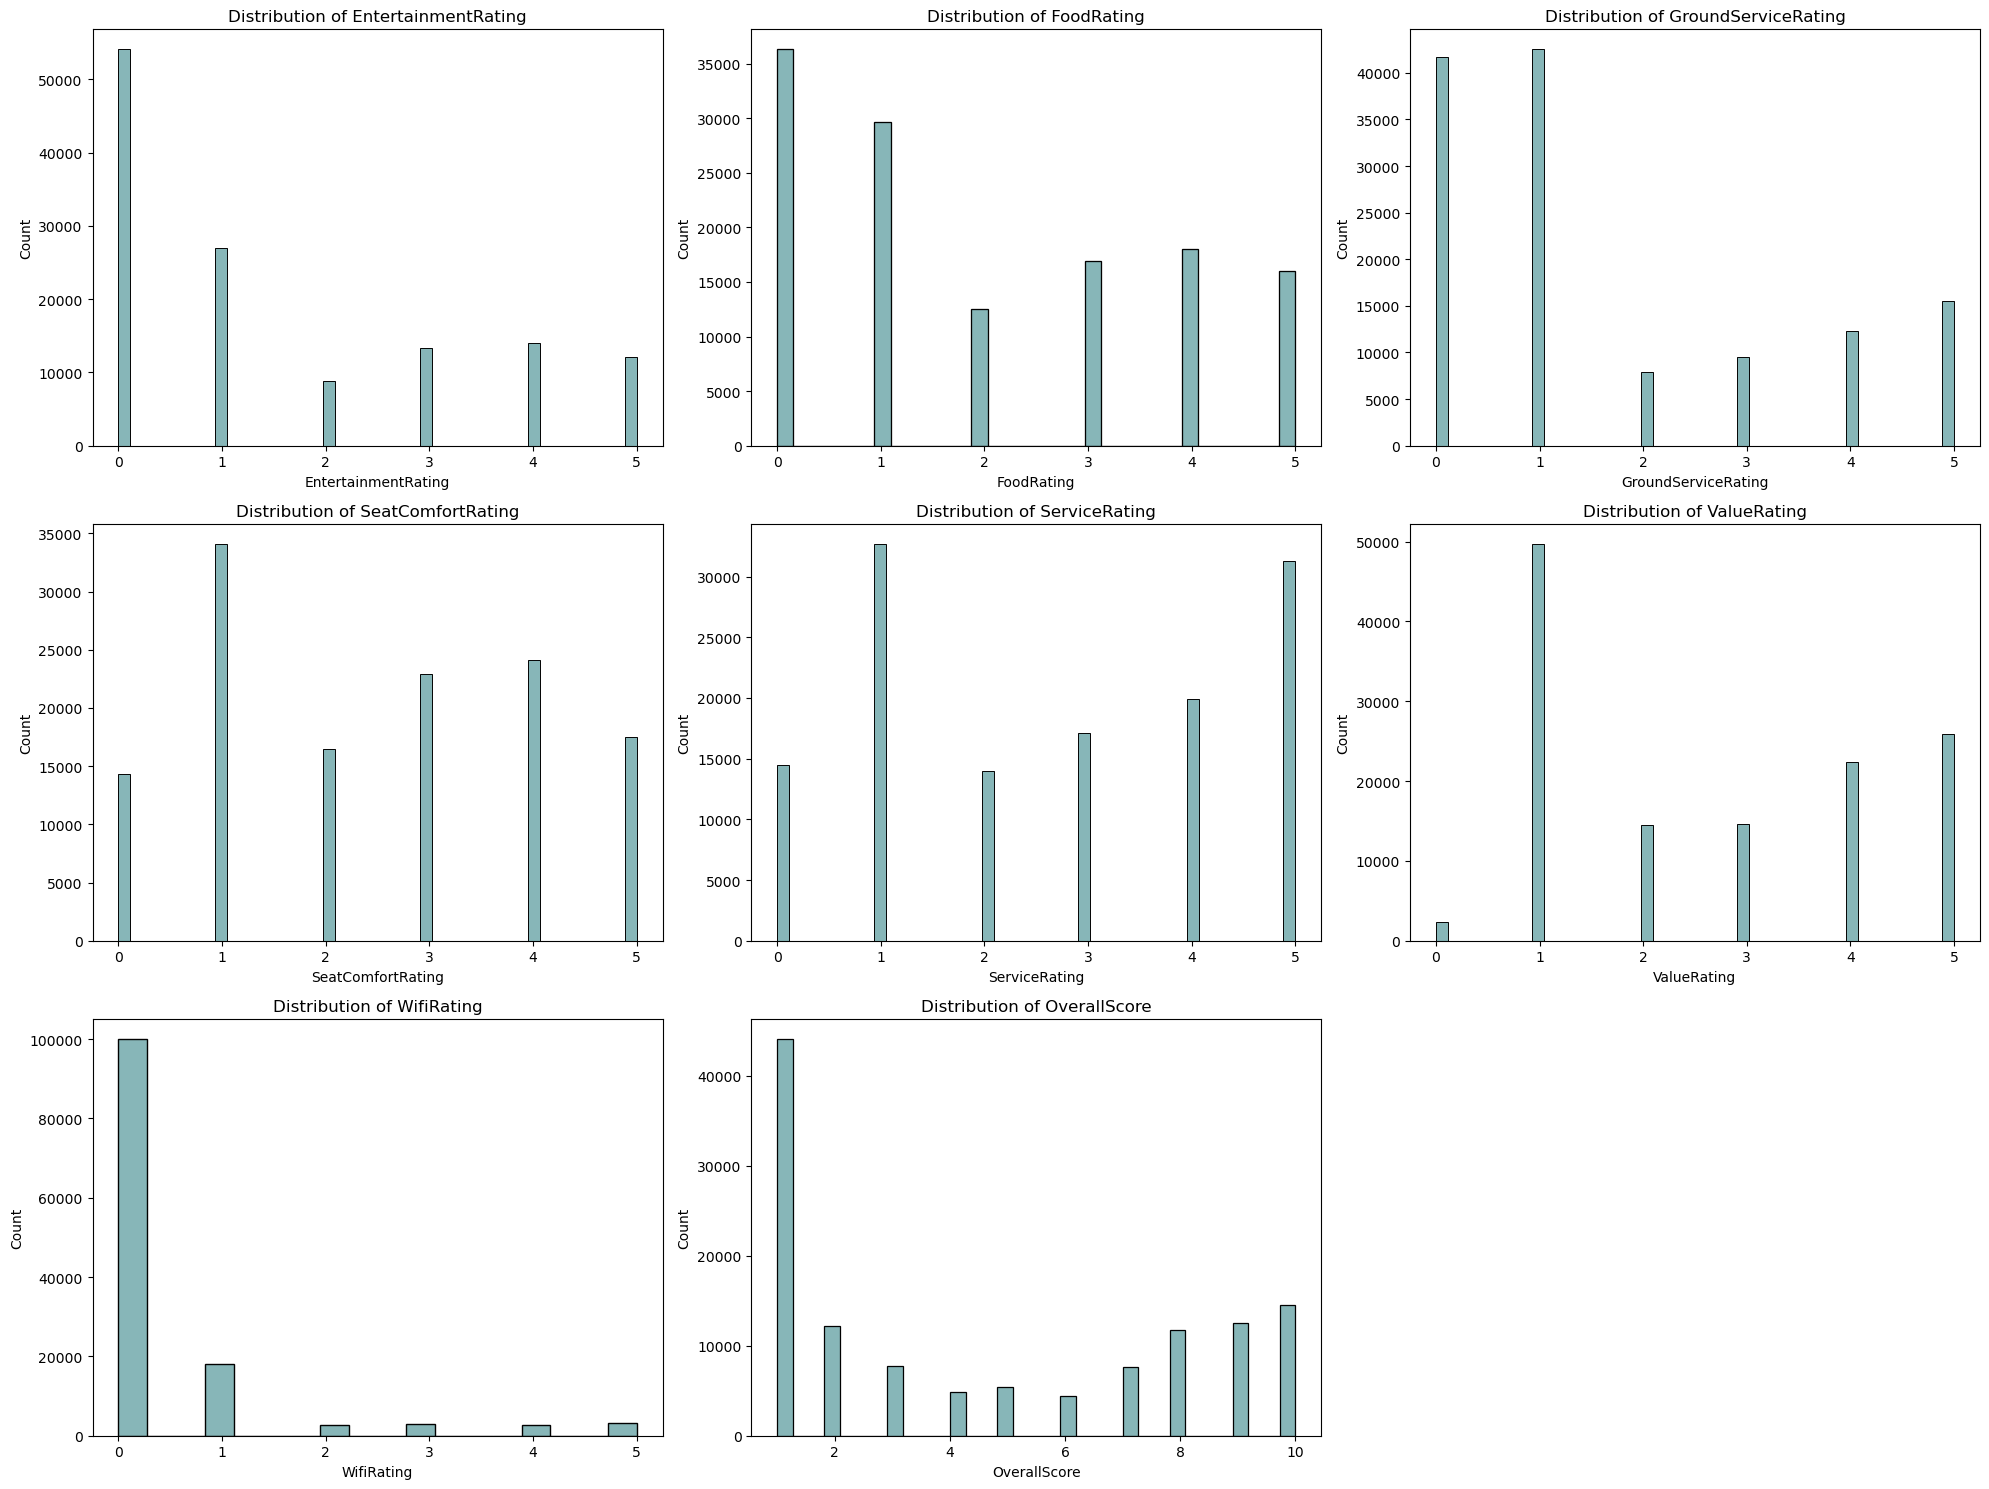

In [48]:
# Use the ratings_columns we can visualize the distribution of each rating
# Determine the number of rows and columns for subplots
num_rows = 3
num_cols = 3
total_plots = num_rows * num_cols

# Create the subplots and axes objects
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Iterate over each numeric column and create histograms
for i, column in enumerate(ratings_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(reviews_df[column], ax=ax, color='cadetblue')
    ax.set_title(f'Distribution of {column}')

# Remove any unused subplots
if i + 1 < total_plots:
    for j in range(i + 1, total_plots):
        row = j // num_cols
        col = j % num_cols
        fig.delaxes(axes[row, col])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Histograms for each rating do not exhibit easily identifiable patterns. However, based on the source website, www.airlinequality.com, and the process of leaving a review on the [Write a Review page](https://www.airlinequality.com/write-a-review/?type=airline), it becomes apparent that all the ratings, including the overall score, are treated as separate items. This suggests that the overall score is not simply the average of the individual ratings. Instead, each rating is likely evaluated independently and contributes to the overall score in a distinct manner. 

In other words, it is not uncommon for a customer to assign a relatively high overall rating, even if they have given lower ratings for other specific items. This could be due to certain factors or experiences that have a significant impact on their overall perception of the airline. For example, a customer may have had an exceptional interaction with the airline staff, which influenced their overall positive perception, despite encountering issues with aspects such as wifi, food, or seating comfort. Therefore, it is reasonable to acknowledge that the overall rating can be disproportionately influenced by a few key factors that hold significant importance to the customer.

It is intriguing to observe that despite the requirement of providing ratings for all 7 items and an overall score on the [Write a Review page](https://www.airlinequality.com/write-a-review/?type=airline), we have a considerable number of missing values the `OverallScore`.

To investigate the issue, we can select 10 random sample rows where the `OverallScore` column is null.

In [49]:
# Filter 10 random rows where the 'OverallScore' column is null
null_scores = reviews_df[reviews_df['OverallScore'].isnull()].sample(10)

# Display the result
display(null_scores)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,MonthYearPublished
21768,Allegiant Air,Economy Class,0,0,0,NaN,no,Have flown several times with Allegiant without incident. Typically I've showed up about an hour before departure time with only carry on. The Plattsburg NY airport has one flight departing at that time and therefore with pre- check-in done and a boarding pass security is a 3-5 minute affair and I'd wait about 35-40 min to board. Pleasant professional on-board staff. Departs on time arrives on time. No complaints until I should up a bit late. Traveling with wife daughter and two young grand children to FL for a family vaca. Due to circumstances beyond our control the usual 2 hr drive took 2.5 hrs. 30 min before departure they refused to check our one pre- paid checked bag saying no room left but directed us to security and suggested we gate check it. This made no sense to me cause gate checked goes in regular baggage hold which is apparently full. The large bag with fluids clearly got the attention of TSA and stalled our progress for about 10 minute. Upon reaching the end of security row an Allegiant agent was waiting for us saying we can't board the door is closed and he can't open it. This was about 10 prior to departure. We walked out to our car and watched the plane parked at the jetway for 15 minutes more. Rebooked on next flight (3 days later). Arrived early. Everything went smoothly. Sat in plane till departure time. Door closed 1 minute before push back from jetway. Total cost for rebooking car rental rebooking baby gear rental rebooking $1250. Why did we re book with Allegiant? No competition at Plattsburg and our return flights already booked. Delta out of Montreal charges about $75 more return and free carry-on. Pretty much break-even and better schedule flexibility.,3,1,0,1,0,2014-06-01
963,Air Caraibes,NaN,0,0,0,NaN,no,I would not recommend travel on Air Caraibes. They cancelled our return flight from St. Barths to St. Maarten in February with no prior notice leaving us standing at the gate. The airline offered no alternative transport and refused to refund the unused portion of our tickets on the spot. The counter staff told us we had to apply for a refund through our travel agent. It has been 45 days since we submitted the refund request via our travel agent and Air Caraibes has still not refunded the fares. While the ground personnel in St. Maarten were professional and polite the agents in St. Barths provided no assistance when our luggage did not arrive with us on our inbound flight (a frequent island occurence) did not answer the phone when called to inquire about the luggage the next morning and kept patrons waiting at the counter for 5 to 10 minutes while chatting amongst themselves in their office a few feet away. They were surly and seemingly annoyed by the presence of customers -- an odd attitude on an island dependent on tourism.,0,0,0,0,0,2005-04-01
112029,TAP Portugal,Economy Class,1,2,0,NaN,no,Flew from London to Lisbon on 10 June (1 hour+ delay) and Lisbon to Salvador on 11 June (4.5 hours delay). In- flight entertainment not working throughout flight to Salvador and customer service at Lisbon airport dreadful. Handed completed complaint form to cabin crew on 11 June and resubmitted complaint online on 30 June but still no response or even acknowledgement. I will never use this airline again.,2,2,0,1,0,2014-07-01
99929,Southwest Airlines,Economy Class,0,2,0,NaN,no,Concerns my wife who flew from Minneapolis with a connecting flight in St. Louis. Final destination Kansas City. Plane left Mpls on time arrived in St. Louis 30 minutes late but were assured connecting flights would hold. Upon arrival the flight left for St. Louis about 10 minutes before the arrival of my wife's flight. There were 18 people on the Mpls flight headed for KC. So presumably the flight to K

Based on the examination of the 10 random samples, two trends can be observed:
- First, there are instances where customers have provided a highly positive review while indicating "no" in the `Recommended` column, creating a conflicting scenario (e.g., 49450, 71807).
- Second, there are reviews that exhibit consistency in terms of content, ratings, and recommendation status. However, all these reviews share a common characteristic of their trips not being verified. Hence, it is plausible to consider that if a review is not verified, the website may render the overall score invalid, resulting in a null value. This finding suggests that the verification status of reviews plays a crucial role in determining the validity and inclusion of the overall score.

To further investigate the relationship between null values in the `OverallScore` column and travel verification, we can refer to the editorial policy of the website. According to their [policy](https://www.airlinequality.com/info/editorial-policy/), it is said that "If you cannot provide this Verification, it is likely your review will not be published." However, without specific knowledge about how the data is scraped and the exact criteria for travel verification, it remains uncertain whether our hypothesis is accurate. It is essential to consider the limitations of the dataset and further explore the data source to gain a clearer understanding of the relationship between travel verification and the presence of null values in the `OverallScore` column.

In [50]:
# Filter rows with no verification and null in overall score
filtered_rows = reviews_df[(reviews_df['TripVerified'] == 0) & (reviews_df['OverallScore'].isna())]

# Display outcomes
display(filtered_rows)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,MonthYearPublished
84,Adria Airways,NaN,0,0,0,NaN,no,BRU-LJU-BRU. Outward flight on a CRJ200 very nice - comfortable excellent service and a good breakfast. Return flight on a 737 leased from Ukrainian airlines was also reasonable despite the limited legroom. Earning Star Alliance points also a plus - would recommend.,0,0,0,0,0,2007-10-01
85,Adria Airways,NaN,0,0,0,NaN,no,I often fly with Adria (50 flights per year). Since Adria is member of Star Alliance there are pretty good connections to the most destinations in Europe. The onboard service is good staff quiet nice. Home base airport in Ljubljana has been upgraded and is getting more international. The business lounge is not on the level it should be - old furniture bad food choice dark. The 3 stars that have been given to Adria are correct.,0,0,0,0,0,2007-08-01
86,Adria Airways,NaN,0,0,0,NaN,no,LGW-LJU-LGW on an older but clean A320. Outwards in 7A with plenty of legroom return in 12F with adequate legroom but need to be careful as the plastic shell on the bottom of the seat in front had started to crack with some sharp edges. Cheese roll served outbound and a jam filled croissant on the return - better than nothing but room for improvement. Coffee and soft drinks free but only one round early in the flight. Very pleasant crew on both sectors. Only gripe was baggage collection at LJU - three flights on one carousel and they seemed to unload baggage in batches from each flight turn about which caused chaos. The second carousel sat unused for the first 40 minutes waiting!,0,0,0,0,0,2007-07-01
87,Adria Airways,NaN,0,0,0,NaN,no,Frankfurt-Ljubljana-Munich in business class: the first flight was on a B737 in the colours of Ukraine International and that plane's interior was substandard while the second flight was on a new CRJ. Both flights on time and without glitch. The service is friendly but meals should be improved. Overall they gave the impression of being a pleasant short haul airline.,0,0,0,0,0,2007-03-01
88,Adria Airways,NaN,0,0,0,NaN,no,Zurich-Ljubljana return. About 2 hours+ journey. Both sector uses the Bombardier Regional Jet CRJ200. Small plane but the 2-3 crews on both sectors were friendly and the service efficient. Seats were comfortable and the planes in good clean conditions. Light meals were served - generally a roll here or a pie there plus drinks. The inflight magazine is surprisingly rich with information on Slovenian culture and way of life and is one of the best I have read. You board the planes on the tarmac via buses from the gates though and not through connecting bridges.,0,0,0,0,0,2006-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129433,Wizz Air,Economy Class,0,0,0,NaN,no,We pre-booked a transfer through Wizz Air for when we flew Luton - Cluj. We waited an hour for our taxi and decided to phone to ask where it was only to be told that they had picked someone else up and no they weren't going to send anyone out to get us no they weren't going to refun the money and that in fact it was all our fault! We had to pay for another taxi to take us to our hotel which was half the cost we had already paid through Wizz Air. I tried to claim the money back from Wizz Air I have written 2 emails and 6 weeks later I am still awaiting a response. Think twice before using!!,0,0,0,1,0,2010-12-01
129436,Wizz Air,Economy Class,0,0,0,NaN,no,Luton-Prague-Luton. Poor service rude cabin crew refused to collect rubbish. Flight Deck Crew spent more time in passenger compartment chatting up cabin staff than flight duties. Ripped seats drunken football fans not dealt with at all. Priority boarding at Prague end ignored by ground staff. Toilets dirty.,0,0,0,1,0,2010-11-01
129437,Wizz Air,Economy Class,0,0,0,NaN,no,Budapest to London with A320 almost 7 hrs delayed. They said due to weathe

Since there are too many instances, we can count the number of instances instead. By using `shape[0]`, we can access the first element (number of rows) of the shape attribute of the DataFrame to retrieve the number of rows in the `filtered_rows` DataFrame.

In [51]:
# Count the number of occurrences where trip is not verified and the overall score is null
count = filtered_rows.shape[0]

# Print the count
print("Number of occurrences:", count)

# Print the total null values in OverallScore
print("Number of nulls in OverallScore:", reviews_df['OverallScore'].isna().sum())

Number of occurrences: 4331
Number of nulls in OverallScore: 4331


The result shows that the number of occurrences where the `TripVerified` is 0 and the `OverallScore` is NaN is 4331. This indicates that all the null values in the `OverallScore` column correspond to reviews where the trips were not verified. 

Since our analysis focuses on factors that impact customer reviews, it is appropriate to remove these null values from the `OverallScore` column rather than imputing them. By doing so, we can ensure that we are considering ratings only from verified trip experiences, which would provide more reliable insights for our analysis.

In [52]:
# Remove all the rows where 'OverallScore' column has null values
reviews_df = reviews_df.dropna(subset=['OverallScore'])

In [53]:
# Sanity check
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125124 entries, 0 to 129454
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   AirlineName          125124 non-null  object        
 1   CabinType            123057 non-null  object        
 2   EntertainmentRating  125124 non-null  int64         
 3   FoodRating           125124 non-null  int64         
 4   GroundServiceRating  125124 non-null  int64         
 5   OverallScore         125124 non-null  float64       
 6   Recommended          125124 non-null  object        
 7   Review               124301 non-null  object        
 8   SeatComfortRating    125124 non-null  int64         
 9   ServiceRating        125124 non-null  int64         
 10  TripVerified         125124 non-null  int64         
 11  ValueRating          125124 non-null  int64         
 12  WifiRating           125124 non-null  int64         
 13  MonthYearPubli

<a id='sec3.9'></a>
### 3.9. `Recommended`

We have two more columns to examin at this data cleaning stage: `Recommended` and `Review`

If the `Recommended` column is binary, then we can convert it into a numeric one.

In [54]:
# Check its values are binary
reviews_df['Recommended'].value_counts()

no     73332
yes    51792
Name: Recommended, dtype: int64

We can replace 'no' with 0 and 'yes' with 1 in the `Recommended` column. After the conversion, we can work with the column as a numeric feature in our analysis and machine learning models.

In [55]:
# Replace values
reviews_df['Recommended'] = reviews_df['Recommended'].replace({'no': 0, 'yes': 1})

In [56]:
# Checkthe proportion of two classes (0 as not recommend and 1 as recommend)
(reviews_df['Recommended'].value_counts()) / len(reviews_df) *100

0    58.607461
1    41.392539
Name: Recommended, dtype: float64

In [57]:
# Check the dataset again
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125124 entries, 0 to 129454
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   AirlineName          125124 non-null  object        
 1   CabinType            123057 non-null  object        
 2   EntertainmentRating  125124 non-null  int64         
 3   FoodRating           125124 non-null  int64         
 4   GroundServiceRating  125124 non-null  int64         
 5   OverallScore         125124 non-null  float64       
 6   Recommended          125124 non-null  int64         
 7   Review               124301 non-null  object        
 8   SeatComfortRating    125124 non-null  int64         
 9   ServiceRating        125124 non-null  int64         
 10  TripVerified         125124 non-null  int64         
 11  ValueRating          125124 non-null  int64         
 12  WifiRating           125124 non-null  int64         
 13  MonthYearPubli

<a id='sec3.10'></a>
### 3.10. `Review`

Now take a look at the null values in the `Review` column.

In [58]:
# Filter rows with the null values in the Review column
null_reviews = reviews_df[reviews_df['Review'].isnull()]

# Display the first 5 rows of filtered dataset
first_5_null_reviews = null_reviews.head(10)
display(first_5_null_reviews)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,MonthYearPublished
219,Aerolineas Argentinas,Business Class,4,3,4,6.0,1,NaN,3,4,0,4,0,2017-02-01
631,Aeroflot Russian Airlines,Economy Class,0,4,4,9.0,1,NaN,4,5,1,3,0,2019-12-01
744,Aeromexico,Premium Economy,1,1,4,2.0,0,NaN,3,1,0,3,1,2023-01-01
979,Aeromexico,Economy Class,0,0,0,1.0,0,NaN,0,0,1,1,0,2022-08-01
1946,Air China,Economy Class,0,0,1,1.0,0,NaN,1,1,0,1,0,2019-07-01
2077,Aeroflot Russian Airlines,Economy Class,5,5,5,10.0,1,NaN,5,5,0,5,0,2017-03-01
2481,Air Canada rouge,Economy Class,5,5,5,10.0,1,NaN,5,5,0,5,5,2019-07-01
2850,Air China,Economy Class,4,4,4,4.0,0,NaN,3,4,0,3,0,2018-06-01
2866,Aeromexico,Economy Class,2,2,1,1.0,0,NaN,2,2,0,1,1,2017-11-01
2944,Aer Lingus,Economy Class,0,0,1,1.0,0,NaN,3,1,0,4,0,2018-05-01


Upon inspecting the first 10 rows where the 'Review' column is null, it appears that some customers did not leave a review but still provided ratings for the 10 items, including 'Recommended' and 'OverallScore'. 

However, as our goal includes performing sentiment analysis based on the content of customer reviews, it is crucial to have meaningful textual data for analysis. 

Considering the relatively low percentage of null values in the 'Review' column (0.7%), it is reasonable to remove these rows from the dataset to ensure the integrity and effectiveness of the sentiment analysis.

In [59]:
# Remove all the rows where 'Review' column has null values
reviews_df = reviews_df.dropna(subset=['Review'])

In [60]:
# Check the result
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124301 entries, 0 to 129454
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   AirlineName          124301 non-null  object        
 1   CabinType            122234 non-null  object        
 2   EntertainmentRating  124301 non-null  int64         
 3   FoodRating           124301 non-null  int64         
 4   GroundServiceRating  124301 non-null  int64         
 5   OverallScore         124301 non-null  float64       
 6   Recommended          124301 non-null  int64         
 7   Review               124301 non-null  object        
 8   SeatComfortRating    124301 non-null  int64         
 9   ServiceRating        124301 non-null  int64         
 10  TripVerified         124301 non-null  int64         
 11  ValueRating          124301 non-null  int64         
 12  WifiRating           124301 non-null  int64         
 13  MonthYearPubli

In [61]:
# Check the current shape
reviews_df.shape

(124301, 14)

In [62]:
# Save the cleaned dataset as a csv file
#reviews_df.to_csv("cleaned_review.csv", index=False)

Now that we cleaned our data, let's proceed to EDA.

<a id='eda'></a>
## 4. Exploratory Data Analysis (EDA)

<a id='sec4.1'></a>
### 4.1. Analysis of Airline Names: Frequency and Distribution

We can analyze the distribution of categorical variables: `AirlineName` and `Review`

First, we can examine the `AirlineName` column.

In [63]:
# Count the unique values
reviews_df['AirlineName'].nunique()

547

Although the number of airlines is too large, let's draw a bar plot to see the general distribution.

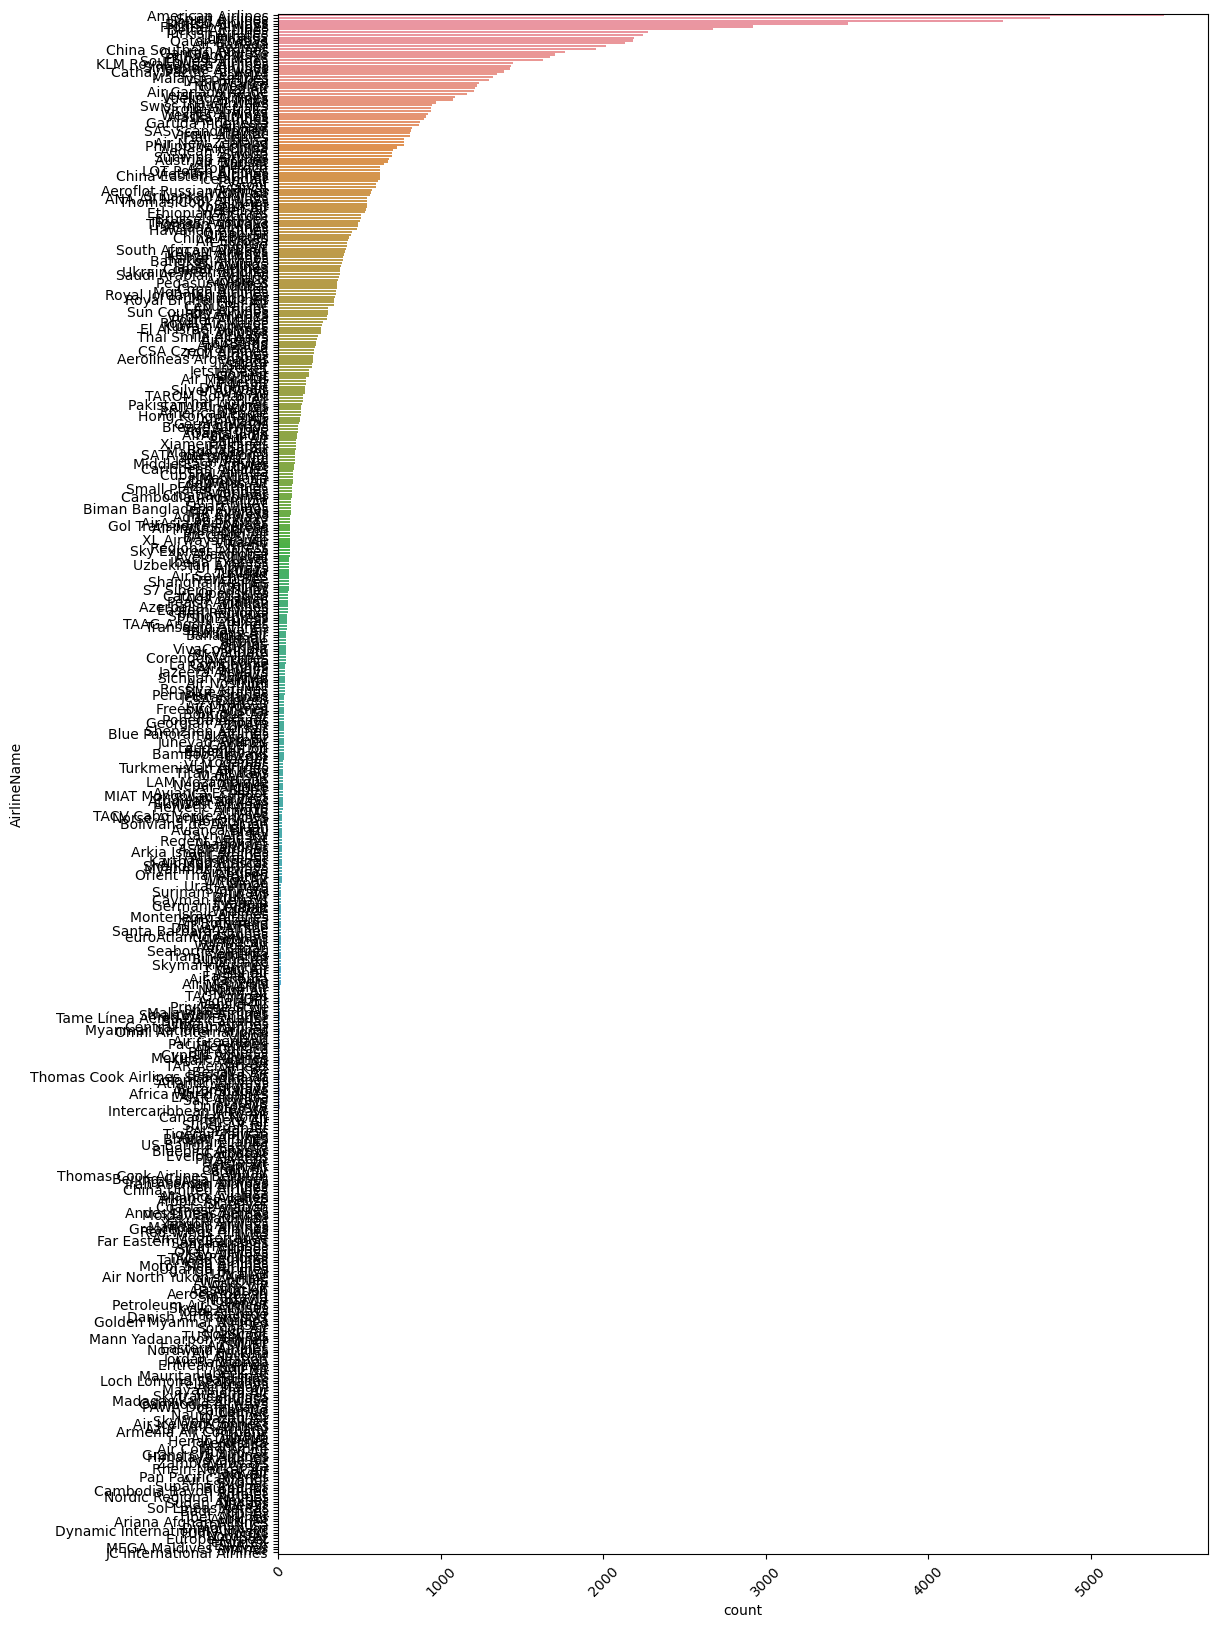

In [64]:
# Compute the value counts of each airline
airline_counts = reviews_df['AirlineName'].value_counts()

# Create the bar plot
plt.figure(figsize=(12,20))
sns.countplot(y='AirlineName', data=reviews_df, order=airline_counts.index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Since it is hard to recognize the names of airlines, we can only show the top 50 most frequently appearing airlines in a bar plot.

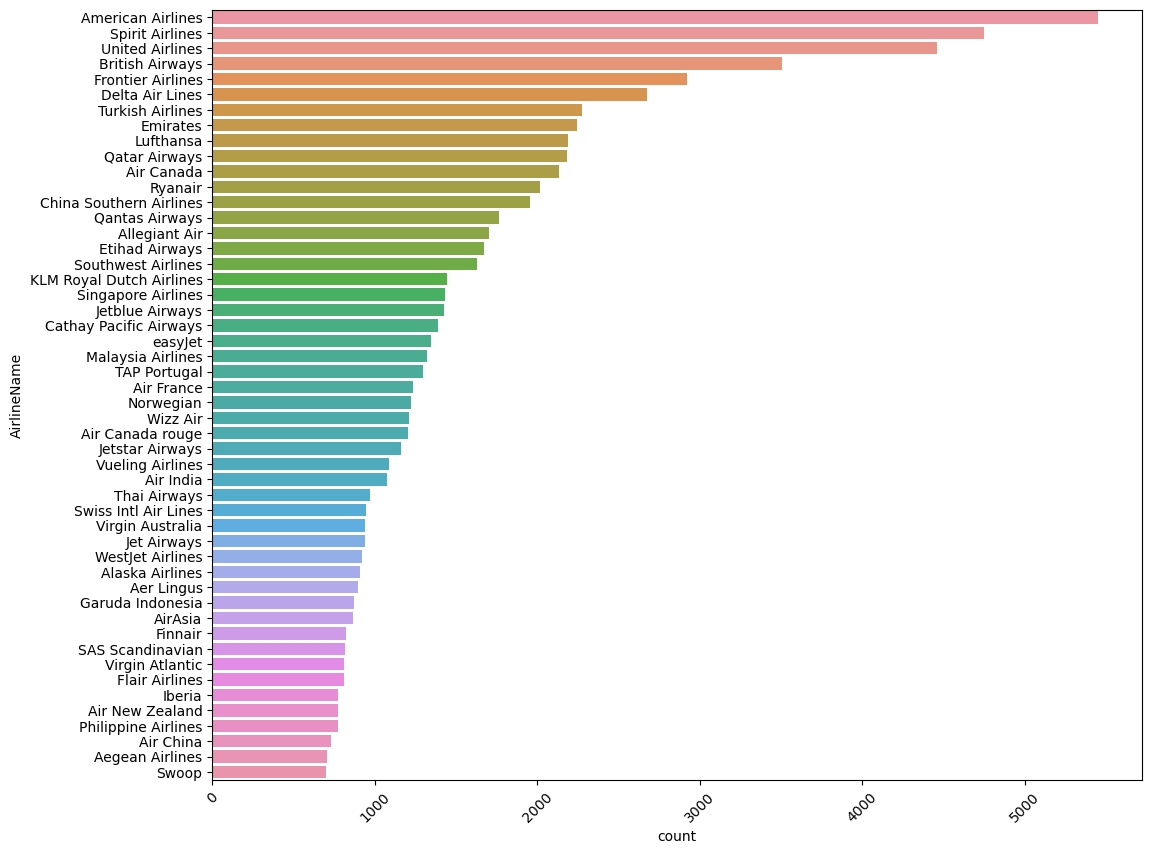

In [65]:
# Get the top 30 most frequent airlines
top_50_airlines = airline_counts[:50].index

# Create the bar plot with the top 50 airlines
plt.figure(figsize=(12, 10))
sns.countplot(y='AirlineName', data=reviews_df, order=top_50_airlines)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Now we can check the number of airlines with low frequency.

In [66]:
# Count the number of airline names that appear only once
unique_airlines = airline_counts[airline_counts == 1].shape[0]

# Print the result
print(unique_airlines)

41


Around 40 airlines only appear once. Let's check how many airlines appear less than 10 times.

In [67]:
# Count the number of airline names that appear less than 10
minority_airlines = airline_counts[airline_counts < 10].shape[0]

# Print the result
print(minority_airlines)

176


176 airlines appear less than 10 times.

To visualize the distribution of airline frequencies in a more granular way, we can create a histogram with bucketed frequency ranges.

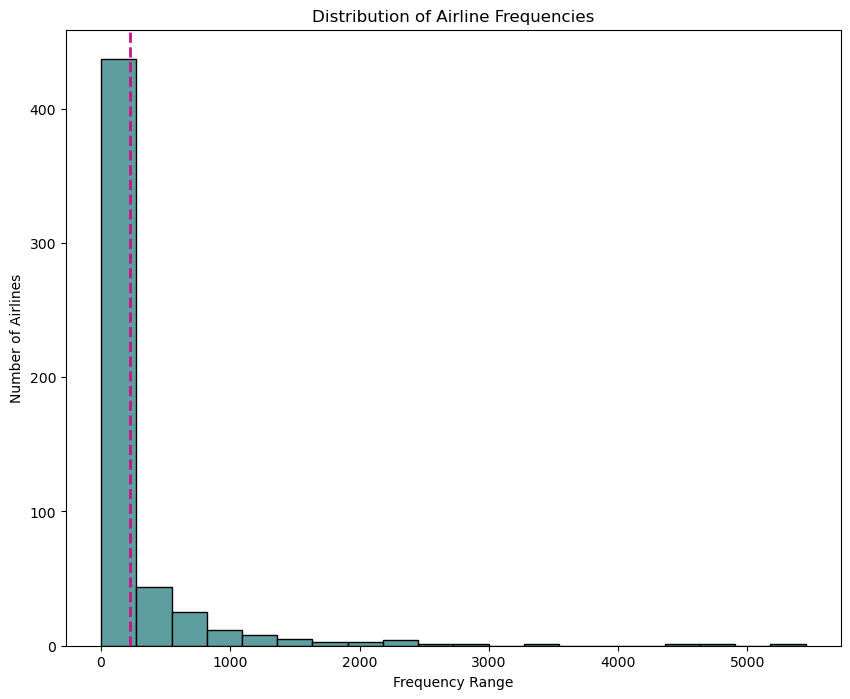

In [68]:
# Compute the value counts of each airline
airline_counts = reviews_df['AirlineName'].value_counts()

# Define the number of bins as 20 for the histogram
num_bins = 20

# Create the histogram plot
plt.figure(figsize=(10, 8))
plt.hist(airline_counts, bins=num_bins, color='cadetblue', edgecolor='black')

# Set the labels and title
plt.xlabel('Frequency Range')
plt.ylabel('Number of Airlines')
plt.title('Distribution of Airline Frequencies')

# Add a line for the mean value
mean = np.mean(airline_counts)
plt.axvline(x=mean, color='mediumvioletred', linestyle='--', linewidth=2)

# Display the plot
plt.show()

The histogram represents the distribution of airline frequencies based on the number of occurrences. The x-axis represents the frequency range, divided into 20 bins, while the y-axis indicates the number of airlines falling into each frequency range.

From the histogram, we can observe that the majority of airlines (440 or less) have a relatively low number of reviews, typically below 280. This indicates that these airlines may be less well-known or less frequently reviewed compared to a few airlines that have a much larger number of reviews, exceeding 5,000. As the frequency range increases, the number of airlines radically decreases, as demonstrated by the declining heights of the bars. 

This distribution provides an overview of the variation in airline frequencies, highlighting the concentration of airlines within specific ranges and the relative scarcity of airlines with higher frequencies.

<a id='sec4.2'></a>
### 4.2. Understanding Patterns: Correlation Heatmap

Now we can create a correlation matrix to identify patterns and relationships between variables.

In [69]:
# Let's get the correlation matrix and save to variable 'corr_mat'
corr_mat = reviews_df.corr()

# Display corr_mat
corr_mat

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating
EntertainmentRating,1.000000,0.635310,0.213937,0.436722,0.389486,0.532326,0.491583,-0.115339,0.437151,0.311686
FoodRating,0.635310,1.000000,0.337742,0.637879,0.584638,0.697528,0.720354,-0.138911,0.630356,0.194454
GroundServiceRating,0.213937,0.337742,1.000000,0.405565,0.373329,0.445983,0.454991,0.200874,0.404857,0.294731
OverallScore,0.436722,0.637879,0.405565,1.000000,0.904851,0.675906,0.685938,-0.219837,0.883895,0.074535
Recommended,0.389486,0.584638,0.373329,0.904851,1.000000,0.617767,0.634232,-0.198055,0.840591,0.054987
SeatComfortRating,0.532326,0.697528,0.445983,0.675906,0.617767,1.000000,0.792448,-0.096287,0.690242,0.159063
ServiceRating,0.491583,0.720354,0.454991,0.685938,0.634232,0.792448,1.000000,-0.096755,0.683699,0.143341
TripVerified,-0.115339,-0.138911,0.200874,-0.219837,-0.198055,-0.096287,-0.096755,1.000000,-0.197814,0.141849
ValueRating,0.437151,0.630356,0.404857,0.883895,0.840591,0.690242,0.683699,-0.197814,1.000000,0.076979
WifiRating,0.311686,0.194454,0.294731,0.074535,0.054987,0.159063,0.143341,0.141849,0.076979,1.000000


Now using the correlation matrix, we can create a heatmap. By displaying the correlation coefficients as colors, we can quickly identify variables that are positively or negatively correlated. Here we will create a masked heatmap, instead of a full one, to enhance the readability. Showing only the half of the correlation matrix allows more focused examination.

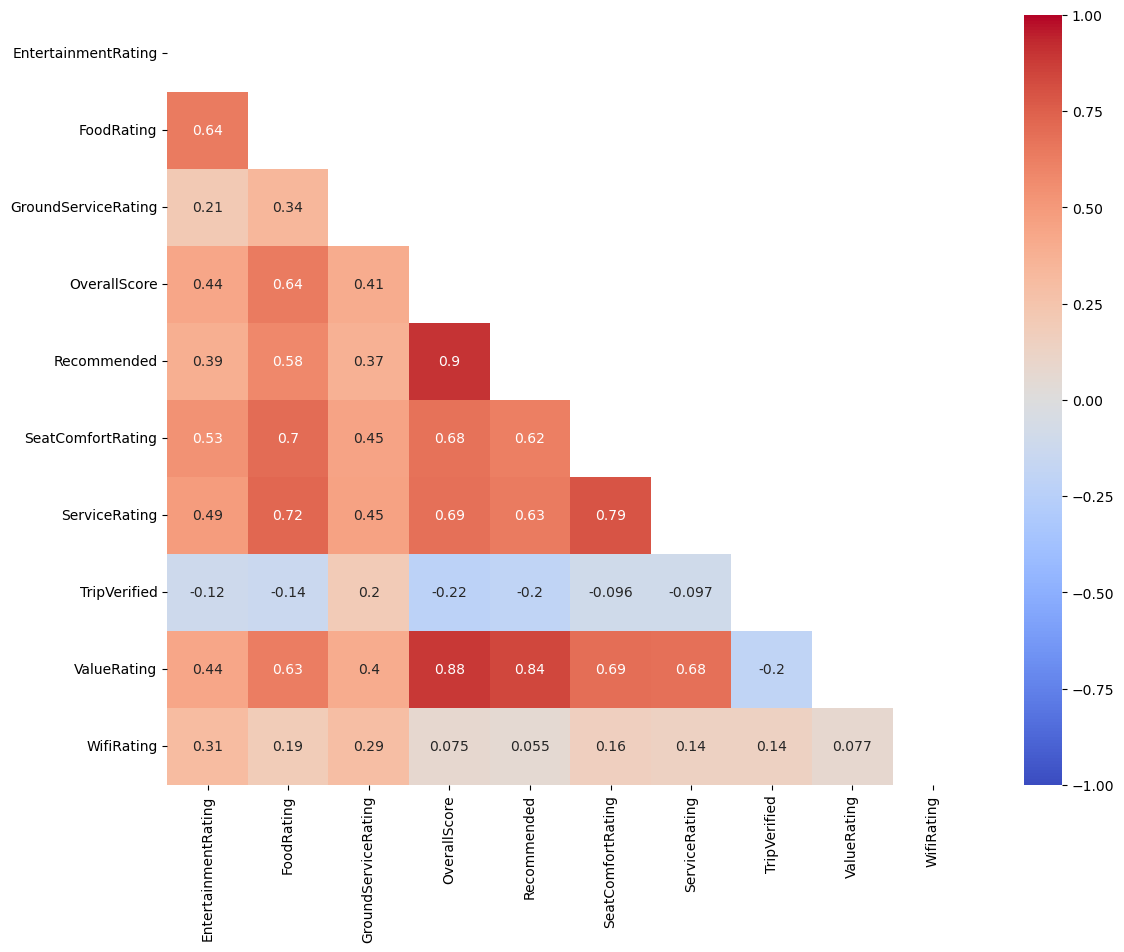

In [70]:
# creating a mask
mask = np.triu(np.ones_like(reviews_df.corr(), dtype=bool))

# Create a heatmap 
plt.figure(figsize=(13,10))
sns.heatmap(corr_mat, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)
plt.show()

The heatmap reveals several strong correlations among the variables in the dataset. 
- There is a high positive correlation of 0.9 between the `Recommended` and `OverallScore` columns, suggesting that customers who provide a higher overall score are more likely to recommend the airline. This aligns with our intuition that customers who have a positive experience across various aspects of their journey are more inclined to endorse the airline to others.
- The `OverallScore` and `ValueRating` columns show a correlation of 0.88. This implies that customers who perceive a higher value for their money are likely to rate the airline more positively overall. The concept of `ValueRating` captures the customers' assessment of whether the airline delivers value for the price they paid.
- The `Recommended` and `ValueRating` columns exhibit a strong correlation of 0.84, indicating that customers' perception of value is closely tied to their likelihood of recommending the airline to others. 
- The `ServiceRating` and `SeatComfortRating` columns display a correlation of 0.79, implying that customers who rate the service highly also tend to rate the seat comfort positively. 
- The `ServiceRating` and `FoodRating` columns show a correlation of 0.72, suggesting that customers' perception of the food quality during the flight substantially influence their overall perception of service quality.
- There is a correlation of 0.7 between the `SeatComfortRating` and `FoodRating` columns, indicating that customers who find the seats comfortable also tend to have a favorable opinion of the food. 

These correlations highlight the interdependencies among different aspects of the customer experience. We should keep in mind that high correlation among variables can pose challenges when creating machine learning models.

Since EDA serves as an initial exploration, we can make note of those correlations among variables and move on.

<a id='sec4.3'></a>
### 4.3. Visualizing Proportions of Recommendations by Airline

Next, we can visualize the proportion of recommendations by airlines to understand how each airline is perceived by customers. By normalizing the data, we ensure that the proportions have a range of 0 to 1, allowing for a more meaningful comparison. A value of 1 indicates that all respondents recommended the airline, while a value of 0 means that none of the customers recommended the airline.

This visualization allows us to quickly grasp the relative level of customer satisfaction for each airline, as well as identify airlines that have a higher likelihood of being recommended and those that may need improvements in their services.

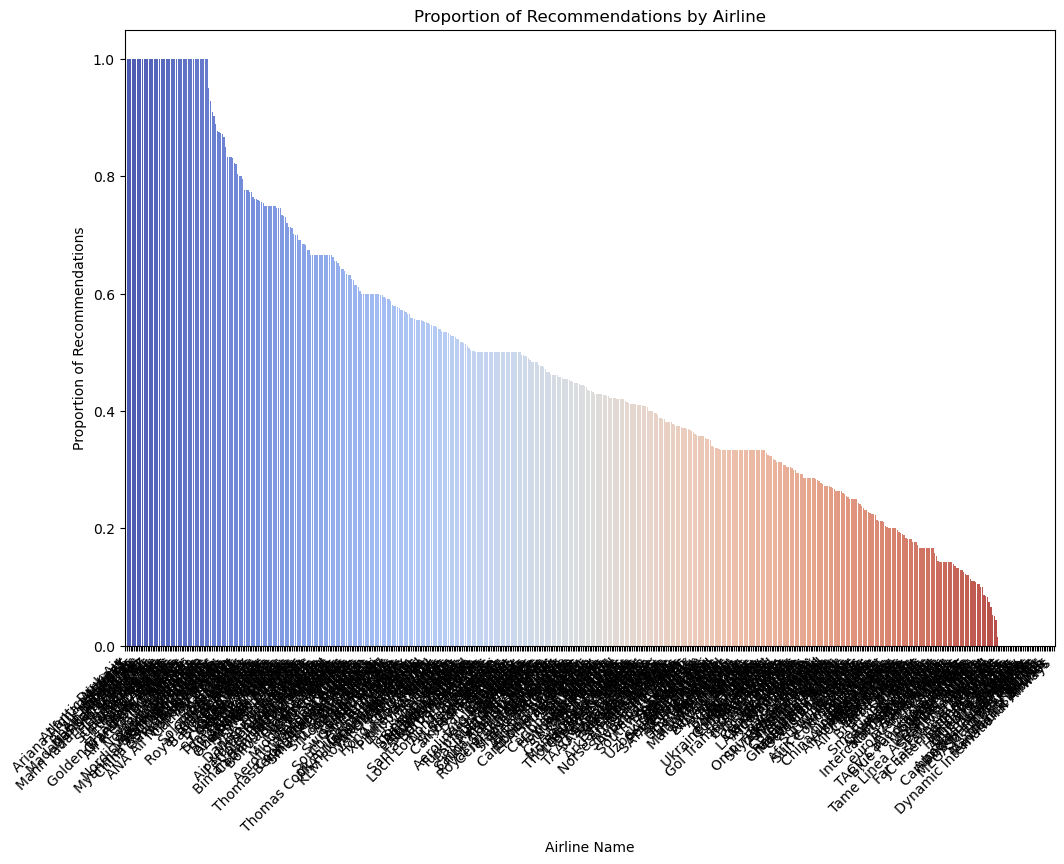

In [71]:
# Calculate the proportion of 'Recommended' for each unique 'AirlineName'
proportions = reviews_df.groupby('AirlineName')['Recommended'].mean()

# Normalize the proportions to have a range of 0 to 1
normalized_proportions = (proportions - proportions.min()) / (proportions.max() - proportions.min())

# Sort the normalized proportions in descending order
sorted_proportions = normalized_proportions.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_proportions.index, y=sorted_proportions.values, palette='coolwarm')
plt.title('Proportion of Recommendations by Airline')
plt.xlabel('Airline Name')
plt.ylabel('Proportion of Recommendations')
plt.xticks(rotation=45, ha='right')
plt.show()

<a id='sec4.4'></a>
### 4.4. Text Vectorization

As the final step of the EDA process, we can analyze the textual data in the `Review` column. We will perform vectorization, transforming the text data into numerical representations that can be used for analysis. 

`CountVectorizer` is a common vectorization technique that tokenizes the text and captures the frequencies of individual words. Vectorization enables us to calculate and visualize the most frequent words and gain insights into the language and sentiment used in the reviews.

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'Review' column
review_vectors = vectorizer.fit_transform(reviews_df['Review'])

# Convert the sparse matrix to a DataFrame
review_vectors_df = pd.DataFrame.sparse.from_spmatrix(review_vectors, columns=vectorizer.get_feature_names_out())

# Print the resulting DataFrame
print(review_vectors_df.head())

   00  000  0000  0001  0002  0003  0004  0005  0005am  0005h  ...  \
0   0    0     0     0     0     0     0     0       0      0  ...   
1   0    0     0     0     0     0     0     0       0      0  ...   
2   0    0     0     0     0     0     0     0       0      0  ...   
3   0    0     0     0     0     0     0     0       0      0  ...   
4   0    0     0     0     0     0     0     0       0      0  ...   

   还有丝绒蛋糕還有各種水果  還放著過年的歌  需要的東西也能及時送到  非常感谢  飛機一路起降也很穩  飞行途中  \
0             0        0            0     0          0     0   
1             0        0            0     0          0     0   
2             0        0            0     0          0     0   
3             0        0            0     0          0     0   
4             0        0            0     0          0     0   

   验票的姐姐说后期再给我提供更多的新消息并且也叫我落地后给她报声平安  ﬁnd  ﬂight  ﬂying  
0                                  0    0      0      0  
1                                  0    0      0      0  
2                   

We see Chinese characters in the outcome of the code. That means the dataset contains reviews in multiple languages, including Chinese. We can modify the `CountVectorizer` initialization and set the `token_pattern` parameter to include only English alphabets and disregard non-alphabetic characters. 

In [73]:
# Create an instance of CountVectorizer with token pattern for English words
vectorizer = CountVectorizer(token_pattern=r'\b[A-Za-z]+\b')

# Fit and transform the 'Review' column
review_vectors = vectorizer.fit_transform(reviews_df['Review'])

# Convert the sparse matrix to a DataFrame
review_vectors_df = pd.DataFrame.sparse.from_spmatrix(review_vectors, columns=vectorizer.get_feature_names_out())

# Print the resulting DataFrame
print(review_vectors_df.head())

   a  aa  aaa  aaaa  aaaaahhhh  aaadvantage  aabay  aaccess  aadhar  \
0  3   0    0     0          0            0      0        0       0   
1  3   0    0     0          0            0      0        0       0   
2  3   0    0     0          0            0      0        0       0   
3  2   0    0     0          0            0      0        0       0   
4  1   0    0     0          0            0      0        0       0   

   aadmirals  ...  zweimal  zx  zya  zyl  zytl  zz  zzurich  zzz  zzza  zzzz  
0          0  ...        0   0    0    0     0   0        0    0     0     0  
1          0  ...        0   0    0    0     0   0        0    0     0     0  
2          0  ...        0   0    0    0     0   0        0    0     0     0  
3          0  ...        0   0    0    0     0   0        0    0     0     0  
4          0  ...        0   0    0    0     0   0        0    0     0     0  

[5 rows x 53834 columns]


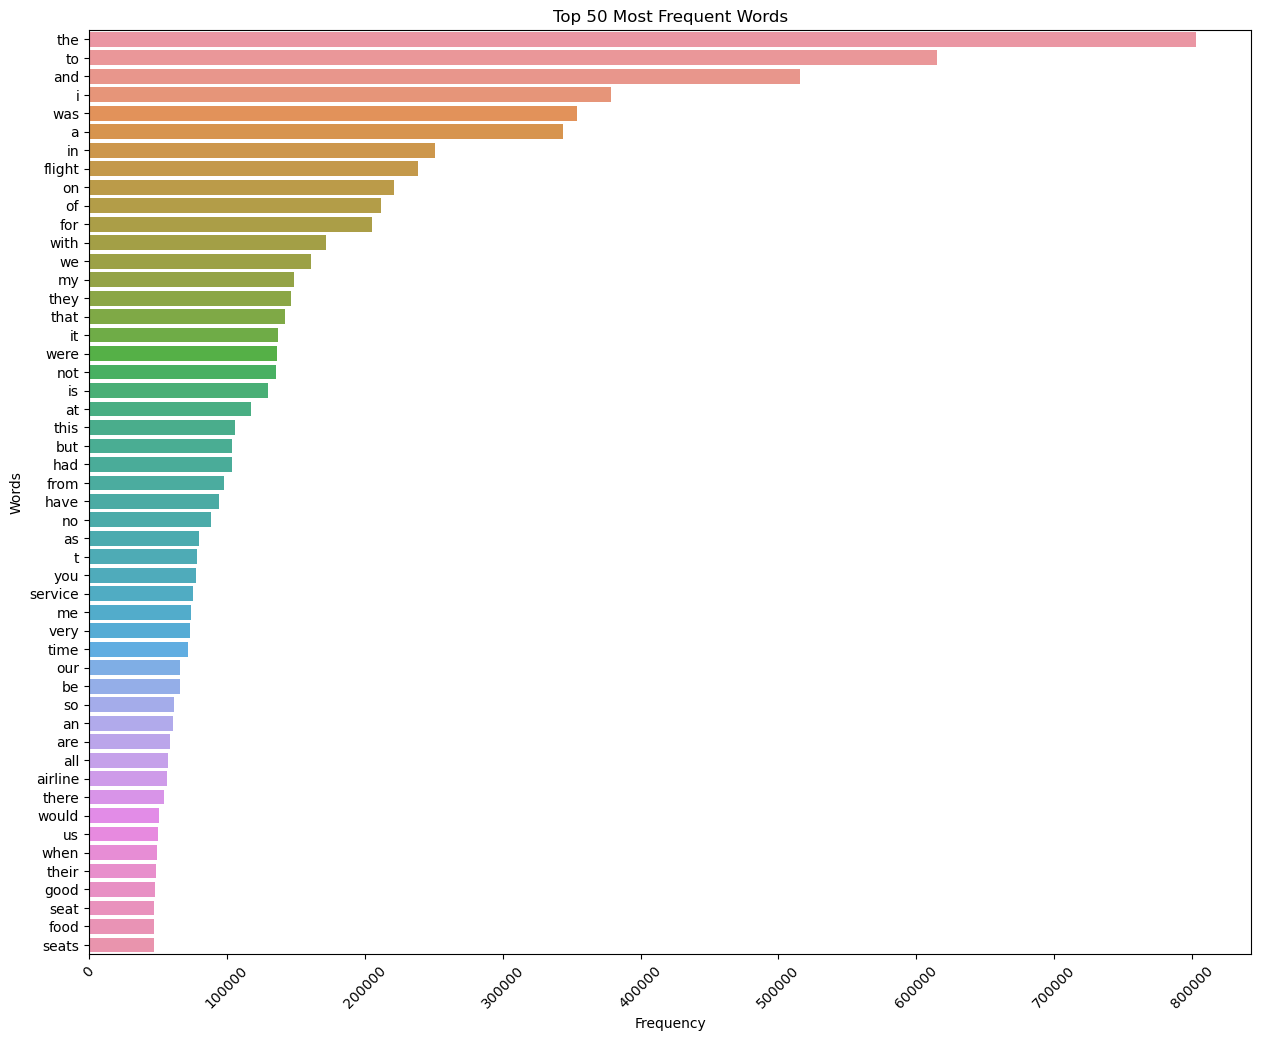

In [74]:
# Compute the word frequencies
word_frequencies = review_vectors_df.sum(axis=0)

# Sort the word frequencies in descending order
sorted_word_frequencies = word_frequencies.sort_values(ascending=False)

# Select the top 50 most frequent words
top_50_words = sorted_word_frequencies.head(50)

# Plot the bar chart
plt.figure(figsize=(15, 12))
sns.barplot(x=top_50_words.values, y=top_50_words.index)
plt.title('Top 50 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.xticks(rotation=45)
plt.show()

As expected, many of the top 50 words are stopwords (e.g., 'the', 'to', 'and'). Since they do not carry significant meaning in the context of text analysis, we can remove them.

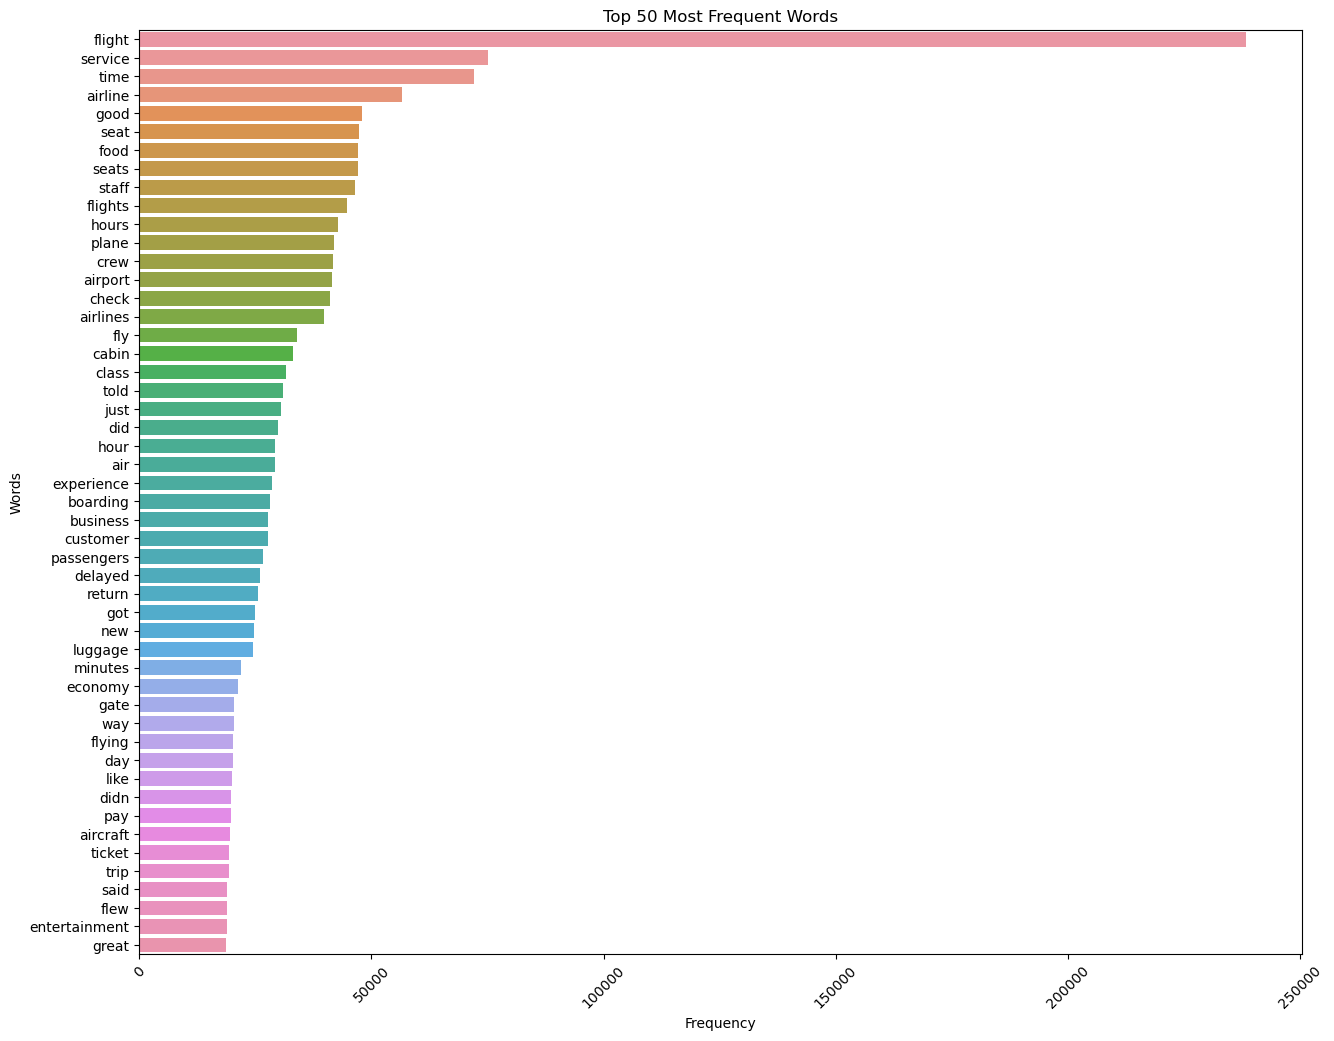

In [75]:
from sklearn.feature_extraction import text # access the predefined English stopwords

# Create an instance of CountVectorizer with stopwords
stopwords = text.ENGLISH_STOP_WORDS
vectorizer = CountVectorizer(stop_words=stopwords)

# Fit and transform the 'Review' column
review_vectors = vectorizer.fit_transform(reviews_df['Review'])

# Convert the sparse matrix to a DataFrame
review_vectors_df = pd.DataFrame.sparse.from_spmatrix(review_vectors, columns=vectorizer.get_feature_names_out())

# Compute the word frequencies
word_frequencies = review_vectors_df.sum(axis=0)

# Sort the word frequencies in descending order
sorted_word_frequencies = word_frequencies.sort_values(ascending=False)

# Select the top 50 most frequent words
top_50_words = sorted_word_frequencies.head(50)

# Plot the bar chart
plt.figure(figsize=(15, 12))
sns.barplot(x=top_50_words.values, y=top_50_words.index)
plt.title('Top 50 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.xticks(rotation=45)
plt.show()

Among the top 50 frequent words, only "good" and "great" carry a positive sentiment, while many other words such as "flight" and "airline" are neutral and do not inherently convey positive or negative sentiment. Instead, these frequent words shed light on the significant aspects of the flight experience that hold importance to customers. They highlight factors such as service quality, seating comfort, food, staff interactions, and overall satisfaction that customers consider when evaluating their flight experience.

Now we can create a word cloud (for fun!) to visualize frequent words. The `WordCloud` library requires a single string input where each word or phrase is separated by spaces. So, we need to concatenate all the reviews to create a single string and then create a word cloud.

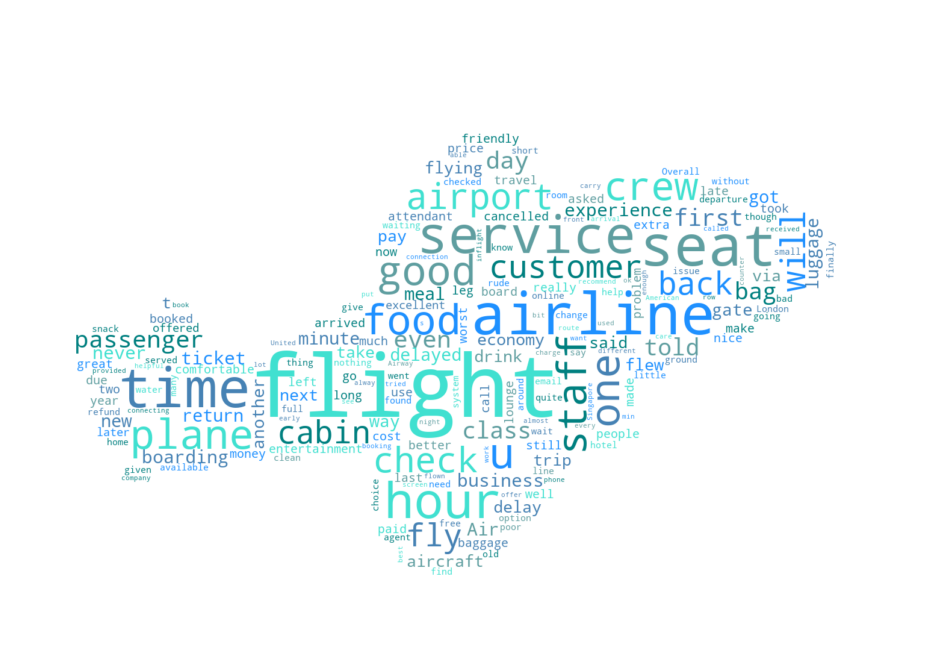

In [76]:
from wordcloud import WordCloud
from PIL import Image

# Concatenate all the reviews into a single string
reviews_text = ' '.join(reviews_df['Review'].astype(str))

# Read the airplane image
airplane_mask = np.array(Image.open('airplane.png'))

# Create a wordcloud with the airplane shape mask
wordcloud = WordCloud(mask=airplane_mask, contour_color='steelblue', background_color='white', collocations=False).generate(reviews_text)

# Define custom colors for the wordcloud
colors = ["steelblue", "dodgerblue", "turquoise", "cadetblue", "teal"]

# Generate the wordcloud with custom colors
wordcloud = wordcloud.recolor(color_func=lambda *args, **kwargs: colors[np.random.randint(0, len(colors))])

# Plot the wordcloud with the airplane shape and custom colors
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<a id='sum'></a>
## 5. Finding Summary

Let's summarize what we've found from our preliminary data exploration, data cleaning, and EDA.

In this notebook, we conducted preliminary data exploration to understand the dataset, cleaned the dataset to improve the data quality, and performed exploratory data analysis. Along the way, we created several visualizations, including bar plots and a heatmap, to grasp patterns and gain valuable insights. Here are the key insights drawn from this work:

- Customer satisfaction is closely tied to the `OverallScore` and `ValueRating`, highlighting the importance of delivering a positive overall experience and value for money. However, it is important to note the presence of high interconnections and correlations among variables, which can lead to multicollinearity issues when applying machine learning techniques. Dealing with multicollinearity through feature selection, dimensionality reduction, or regularization methods becomes crucial to ensure the robustness of the models and reliable predictions.

- The histogram analysis revealed that the majority of airlines have relatively low review counts, while only a few airlines have a significantly higher number of reviews. This indicates the need for careful interpretation and consideration of sample size when analyzing airline performance based on customer reviews. Airlines with a smaller number of reviews may require additional data collection efforts to provide more robust insights.

- Through the analysis of the frequent words in customer reviews, we can gain insight into what aspects of customer experience shape their reviews. Factors such as service, time, food, seats, and staff, play a significant role in shaping customer perceptions and satisfaction.

Overall, we have gained a good understanding of the dataset. The EDA phase is an iterative process, and as we proceed with further analysis or modeling, we may discover new insights and revisit the earlier processes. Nonetheless, this summary provides a good foundation for deeper analysis and modeling.

<a id='next'></a>
## 6. Next Steps

In the following notebook(s), we will formulate research questions and hypotheses, conduct hypothesis testing, and utilize machine learning techniques to build predictive models for outcomes such as overall score and customer recommendations. Additionally, we will explore sentiment analysis methods to gain further insights from customer reviews. These steps will enhance our understanding of the data and provide valuable insights for decision-making.